<a href="https://colab.research.google.com/github/ameernayman/Sensitive_image_classification/blob/sensitive_classification/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensitive Data classification for text

##  This model run in google colab https://colab.research.google.com/

In [11]:
import tensorflow as tf
import json
import os
import random
import numpy

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:

text_folder = "/content/Sensitive_image_classification"
if os.path.exists(text_folder) == False:
  !git clone https://github.com/demoproject-sensitive/Sensitive_image_classification

dataset_text = text_folder + "/dataset_text/"
sensitive_json = "data_sensitive.json"
nonsensitive_json = "data_nonsensitive.json"

### Text model Preprocessing the dataset

In [13]:
textData = []
textSentences = []
textLabels = []
size_training = 20000
stopwords_text = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

def load_data(filename):
  with open(dataset_text + filename, 'r') as f:
      data_store = json.load(f)
  for value in data_store:
    textSentences = value['data']
    textLabels = value['is_sensitive']
    for wrd in stopwords_text: 
      token = " " + wrd + " "
      textSentences = textSentences.replace(token, " ")
    textData.append([textSentences, textLabels])


load_data(sensitive_json)
load_data(nonsensitive_json)

random.shuffle(textData)


for item in textData:
  textSentences.append(item[0])
  textLabels.append(item[1])


training_snt_text= textSentences[0:size_training]
validation_snt_text = textSentences[size_training:]
training_lbls_text = textLabels[0:size_training]
validation_lbls_text = textLabels[size_training:]

print("Size of Training Data set is: ", len(training_snt_text))
print("Training Data Sample:", training_snt_text[0])
print("Size of Validation Data set is: ", len(validation_snt_text))
print("Validation Sample:", validation_snt_text[0])

Size of Training Data set is:  20000
Training Data Sample: In film, NASA managers Morton Thiokol engineers argue back forth whether data Thiokol adequate support risk claim. In teleconference, Thiokol engineer Roger Boisjoly describes NASA team soot prior O-ring "blow-by" incidents prior launches "black", trying communicate severity malfunction, says "it looked bad". A NASA director challenges him, asking "What black color mean?" Boisjoly, played Boyle, unable put words concrete logical argument obviously serious problem, just replies something like, "I'm telling you, seen it, know isn't good." The NASA manager demands proof will ground shuttle, call ends leaving Boisjoly frustrated baffled attitude. Unable prove case certainty, Thiokol managers cave direct pressure reverse recommendation, finally recommending launch.
Size of Validation Data set is:  11576
Validation Sample: Pete Nelson, smooth operator just discharged Army, joins forces old buddy, loud Jerome X. Hotchkiss, together jo

# Creating training, validation sequence and labels 

In [14]:

type_trunc='post'
padding='post'
out_of_vocb = "<OOV>"

length_text = 60
size_vocab = 3000
tknizer = Tokenizer(num_words=size_vocab, oov_token=out_of_vocb)

tknizer.fit_on_texts(training_snt_text)

index_words = tknizer.word_index
print("Size of word index:", len(index_words))

with open("word_index.json", "w") as outfile:  
    json.dump(index_words, outfile)
    print("Saving the word index as JSON")


training_squnce = tknizer.texts_to_sequences(training_snt_text)
padding_Tdataset = pad_sequences(training_squnce, maxlen=length_text, padding=padding, truncating=type_trunc)


validation_squnce = tknizer.texts_to_sequences(validation_snt_text)
padding_Vdataset = pad_sequences(validation_squnce, maxlen=length_text, padding=padding, truncating=type_trunc)
padding_Tdataset = numpy.array(padding_Tdataset)
training_lbls_text = numpy.array(training_lbls_text)
padding_Vdataset = numpy.array(padding_Vdataset)
validation_lbls_text = numpy.array(validation_lbls_text)

Size of word index: 103120
Saving the word index as JSON


## Sequential Model Using Conv1D, GlobalPooling, and with Dense layer

In [15]:

dimensions = 32
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(size_vocab, dimensions, input_length=length_text),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 32)            96000     
                                                                 
 conv1d_1 (Conv1D)           (None, 56, 64)            10304     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 107,889
Trainable params: 107,889
Non-trainable params: 0
________________________________________________

# Callback function to aviod overfitting

In [16]:
no_epochs = 6
ACCURACY = 0.999
class myEpoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > ACCURACY:
      print(" Accurracy is 0.99 then cancel the epoch")
      self.model.stop_training = True

epoch_callbacks = myEpoch()


## Valdation and Training model fitting


In [17]:

text_his = model.fit(padding_Tdataset, 
                    training_lbls_text, 
                    epochs=no_epochs, 
                    validation_data=(
                        padding_Vdataset, 
                        validation_lbls_text), 
                    verbose=1,
                    callbacks=[epoch_callbacks])

Epoch 1/6
625/625 [==============================] - 7s 10ms/step - loss: 0.0580 - accuracy: 0.9910 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 2/6
625/625 [==============================] - 6s 10ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 0.9996


## Plotting Accuracy and Loss graph for Text Model

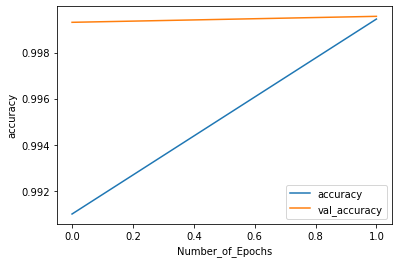

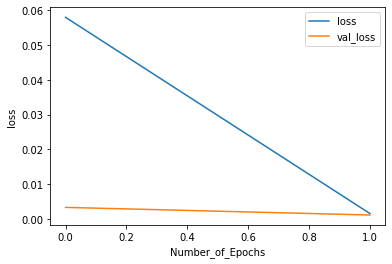

In [18]:
import matplotlib.pyplot as plot


def graphsPlot(text_his, str):
  plot.plot(text_his.history[str])
  plot.plot(text_his.history['val_'+str])
  plot.xlabel("Number_of_Epochs")
  plot.ylabel(str)
  plot.legend([str, 'val_'+str])
  plot.show()
  
graphsPlot(text_his, "accuracy")
graphsPlot(text_his, "loss")

# Ploting the Confusion Matrix

Accuracy for 8682 Test Data =  99.97696383321816
Accuracy for 11576 Test Data =  99.95680718728404
Accuracy for 14470 Test Data =  99.95680718728404
Accuracy for 17364 Test Data =  99.95680718728404


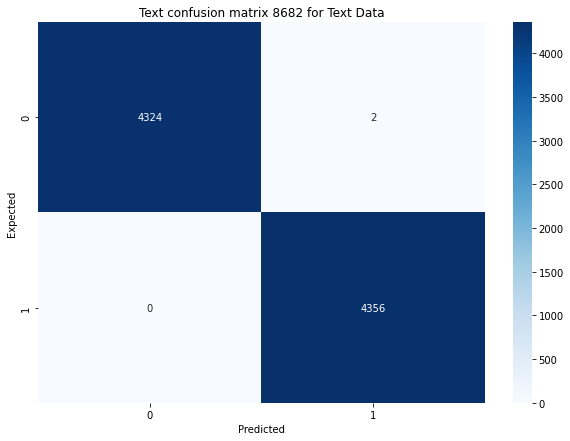

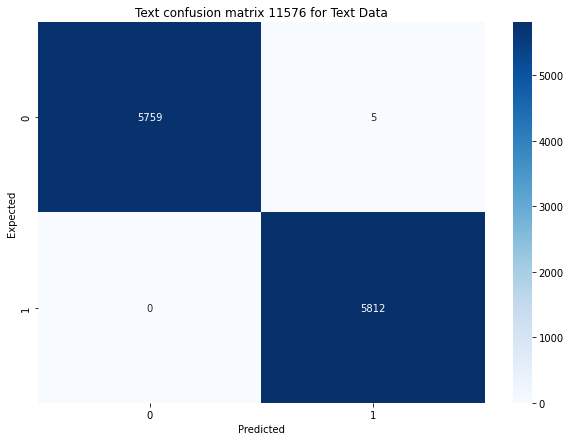

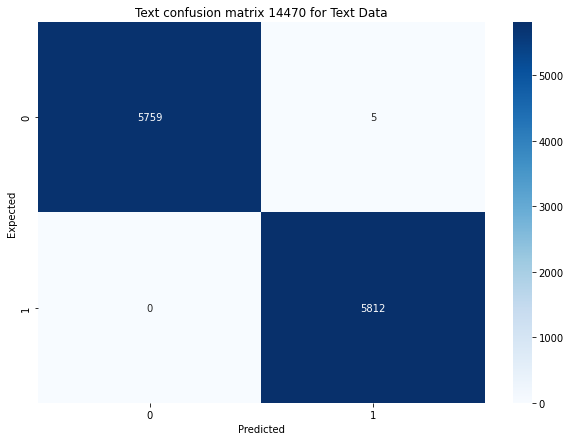

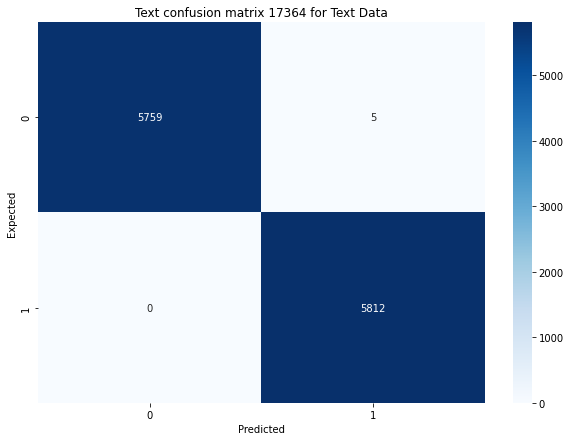

In [19]:
import seaborn

text_predicted = model.predict(padding_Vdataset)
predicted_text_labels = text_predicted > 0.5

size = numpy.size(predicted_text_labels)
predicted_text_labels = predicted_text_labels.reshape(size, )

for num in range (3, 7):
  count = num * size // 4
  text_matrix = tf.math.confusion_matrix(labels=validation_lbls_text[0:count],predictions=predicted_text_labels[0:count])

  confusion_matrix = text_matrix.numpy()
  conf_acc = (confusion_matrix[0, 0] + confusion_matrix[1, 1])/ numpy.sum(confusion_matrix) * 100
  print("Accuracy for", str(count), "Test Data = ", conf_acc)

  plot.figure(figsize = (10,7))
  seaborn.heatmap(text_matrix, annot=True, fmt='d', cmap='Blues')
  plot.title("Text confusion matrix " + str(count) + " for Text Data")
  plot.xlabel('Predicted')
  plot.ylabel('Expected')

## Experiment

In [20]:

list_sntnc = ["My friend name is Peter Parker", "Credit card number is 99111","congratulations, I got a job", "cup of tea season 8 release is on Sunday"]
txt_seq = tknizer.texts_to_sequences(list_sntnc)
text_pad = pad_sequences(txt_seq, maxlen=length_text, padding=padding, truncating=type_trunc)
text_prediction = model.predict(text_pad)
print("OUTPUT : Text sensitive and non-sensitive"+"\n")
for val in range(len(text_prediction)):
  print(text_prediction[val][0])
  if text_prediction[val][0]>0.5:
    print("Text is sensitive - "+ list_sntnc[val])
  else:
    print("Text is non-nensitive - " + list_sntnc[val] )

OUTPUT : Text sensitive and non-sensitive

0.98272014
Text is sensitive - My friend name is Peter Parker
0.9947468
Text is sensitive - Credit card number is 99111
0.08132821
Text is non-nensitive - congratulations, I got a job
0.26206928
Text is non-nensitive - cup of tea season 8 release is on Sunday
